<a href="https://colab.research.google.com/github/pfjapena/youtube_channel/blob/main/4_Integraci%C3%B3nDatos_Macro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Teoría de la Credibilidad**
0. Se procede de las librerias de trabajo


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Para cargar el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se cargar las bases de datos (Observada,Externa)

la correlación entre las variables es:
               Fechas  Frecuencia  Severidad       LDA
Fechas      1.000000    0.030690  -0.001195 -0.010241
Frecuencia  0.030690    1.000000   0.044028  0.463401
Severidad  -0.001195    0.044028   1.000000  0.779725
LDA        -0.010241    0.463401   0.779725  1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


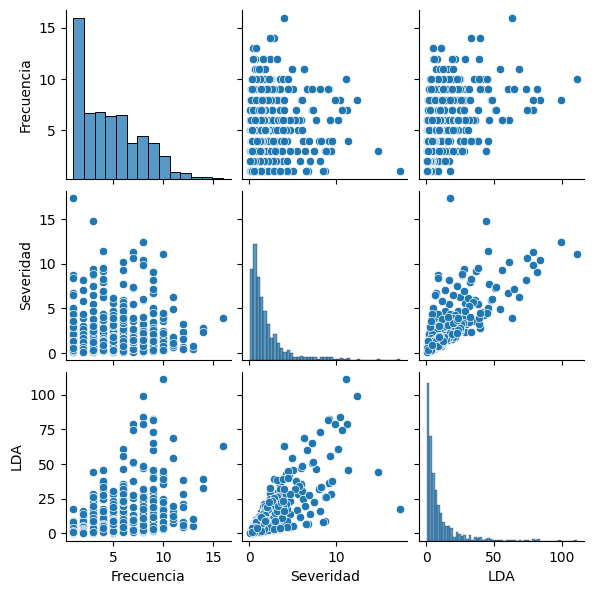

In [12]:
nxlo='/content/drive/MyDrive/2. IntegraciónDatos(02-2024)/6.3 FallasTecnológicas.xlsx'
nxle='/content/drive/MyDrive/2. IntegraciónDatos(02-2024)/6.3 AdmonEjecProcesos.xlsx'

XDBo=pd.read_excel(nxlo,sheet_name=1)
XDBe=pd.read_excel(nxle,sheet_name=1)

#Para determinar las variables más importantes de una base datos
print("la correlación entre las variables es:\n",XDBo.corr())

sns.pairplot(XDBo,size=2,vars=['Frecuencia','Severidad','LDA'])

2. Se procede con la caracterización de las variables de salida LDAo,LDAe

<ipython-input-23-a67fbea935e3>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LDAo,kde=True,color='red',hist=False)
<ipython-input-23-a67fbea935e3>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(LDAe,kde=True,color='green',hist=False)


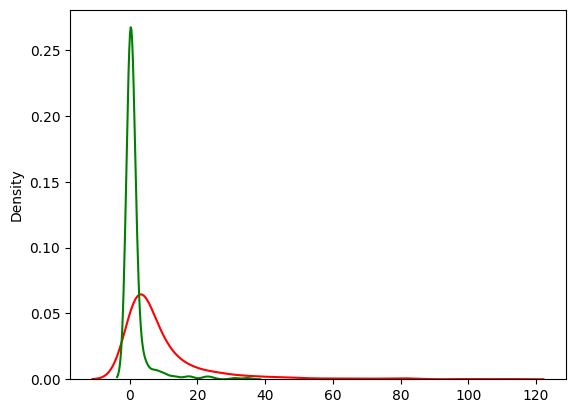

El valor de la EPV es: 130.67330496151962


In [23]:
#Buscamos las características estadísticas de las variables explicadas
from scipy.stats import skew #Coeficiente de asimetría

LDAo=np.array(XDBo.iloc[:,3])
LDAe=np.array(XDBe.iloc[:,3])

#Se procede con la gráfica de las distribuciones de probabilidad
plt.figure()
sns.distplot(LDAo,kde=True,color='red',hist=False)
sns.distplot(LDAe,kde=True,color='green',hist=False)
plt.show()

#1. Se determina el número de datos por cada base de datos
NDo=len(LDAo); NDe=len(LDAe)

#2. Se procede con el calculo de la EPV
varo=np.var(LDAo);vare=np.var(LDAe)
EPV=(NDo*varo+NDe*vare)/(NDo+NDe)
print("El valor de la EPV es:",EPV)

